# INTRODUCTION

Linear Regression is one of the most popular supervised machine learning algorithm that predicts the target value based on some input variables known as predictors. In this particular notebook we will be using linear regression model to predict tomorrow's temperature using historical data.

In [2]:
import pandas as pd

# Read data 
data=pd.read_excel(r"C:\Users\Asus\Downloads\clean_weather.xlsx",engine='openpyxl')

# Fill in any missing values in the data with past values
data = data.ffill()

# let's display first five rows of our dataset
data.head(5)

,Unnamed: 0,tmax,tmin,rain,tmax_tomorrow
0,1970-01-01,60.0,35.0,0.0,52.0
1,1970-01-02,52.0,39.0,0.0,52.0
2,1970-01-03,52.0,35.0,0.0,53.0
3,1970-01-04,53.0,36.0,0.0,52.0
4,1970-01-05,52.0,35.0,0.0,50.0


# Intution Behind Linear Regression

In the data I imported above ,each row is a diffrent day with different weather observation associated with that day and we have the data from year 1970 to present day. Using the above data we have to predict tmax_tomorrow [tomorrow's temperature] based on the parameters tmax[maximum temperature of present day], tmin[minimum temperature of present day]and amount of rain happened[rain].

Linear Regression requires a linear relation between predictors and target value. if two values are in linear relation , then the changing of one value will cause proportional change in other value. To visualise this we can use a scatter plot.

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

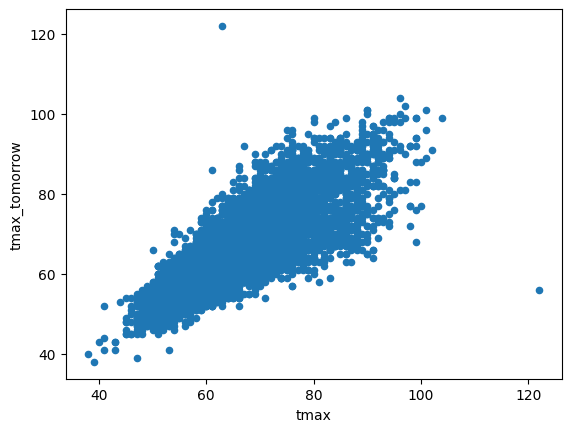

In [3]:
# lets visualise a relationship between tmax and tmax_tomorrow
data.plot.scatter("tmax","tmax_tomorrow")

As we can see above a linear relation exist between tmax and tmax_tomorrow as with the increase in tmax ,tmax_tomorrow also increases proportionally.

So if we plot a line through the center of the cloud of points,we can use that line to predict the value of tmax_tomorrow using tmax.
Since tmax is linearly related to tmax_tomorrow the line will tell us what value to multiply to tmax to get accurate prediction of tmax_tomorrow.

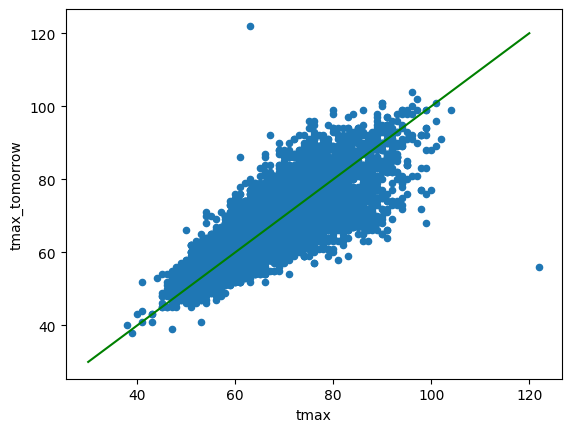

In [4]:
import matplotlib.pyplot as plt
data.plot.scatter("tmax","tmax_tomorrow")
plt.plot([30,120],[30,120],'green')


The above line is multiplying tmax by 1 to get tmax_tomorrow

# Linear Regression Equation

The Job of the Linear Regression model is to learn the correct values needed to be multiplied by the predictors in order to get accurate predictions.

$\hat{y}=w_{1}*x_{1}+w_{2}*x_{2}+w_{3}*x_{3}+b$

- $\hat{y}$ is the predicted value for tmax_tomorrow.
- $x_{1}$ , $x_{2}$ and $x_{3}$ are the predictors , in this case{tmax, tmin , rain} using which we will predict out target value.
- w are the weights that Linear Regression algorithm will learn.Weights are basically the values needed to be multiplied to predictors x so as to get the accurate value of $\hat{y}$.
- b is the bias or y-intercept .This helps us to shift the prediction line up and down to fit the data.Without bias if our predictors are all zero's then our prediction will also be zero.


Let's take a look at how the Linear Regression model works ..using single predictor tmax.

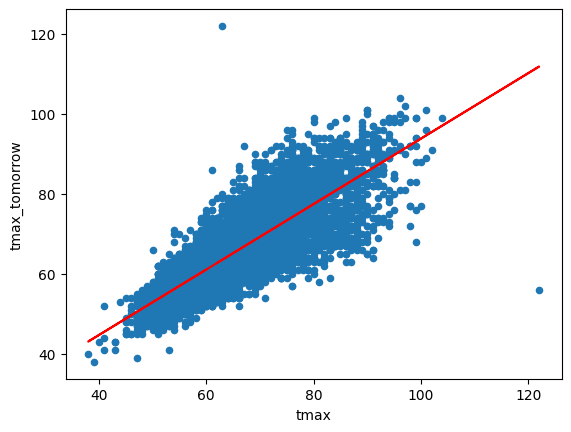

In [5]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fit a linear regression model
lr=LinearRegression()
lr.fit(data[['tmax']],data[['tmax_tomorrow']])

# Plotting data points and Regression line
data.plot.scatter("tmax","tmax_tomorrow")
plt.plot(data["tmax"], lr.predict(data[['tmax']]),color="red")

In the above cell, we fit a linear regression model using a library called `scikit-learn`.  The data points are in blue, and the linear regression line (predicted temperatures) is in red.

We can take a look at the coefficients for the line below:

In [6]:
print(f"Weight: {lr.coef_[0]}")
print(f"Bias: {lr.intercept_}")

Weight: [0.81854683]
Bias: [11.98656138]


Our predictions for `tmax_tomorrow` will be $\hat{y}=.82 * \text{tmax} + 11.99$.  Now let's learn how to build our own linear regression algorithm.

## Calculating Loss

So we will be using Gradient Descent algorithm to build our Linear Regression Model but for that we need to first calculate loss.

Let's assume that for a given day `tmax` is `80` ,now using above equation we can calculate `tmax_tomorrow` which turns out to be `77.59`.Now we can calculate the loss.Loss is basically the difference between actual value and predicted value .Here we will be using squared error for finding loss which can be expressed as     
$\text{MSE}=(\hat{y} - y) ^ 2$.

if actual `tmax_tomorrow` is `81`, then loss will be (77.59-81)$^2$ ,which is equal to `11.63`.
Our parameters(`weight` and `bias`) led to this loss.if we change them loss wwill also change.

Let us visualize what it would look if `weight` is set to `1`.

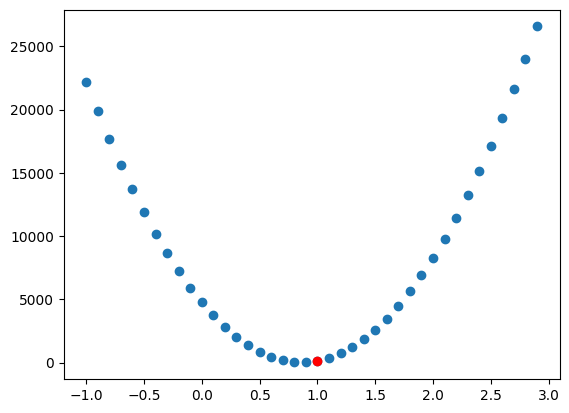

In [7]:
import numpy as np
# Calculating loss taking present tmax to be 80
loss=lambda w,y:((w*80+11.99)-y)**2

# actual value of y
y=81

# we are taking a range of different values for weight
ws=np.arange(-1,3,0.1)
losses=loss(ws,y)

# Plot the weight and losses
plt.scatter(ws,losses)
# Plot a weight of 1 and the corresponding loss
plt.plot(1,loss(1,y),'ro')

In the above graph x axis represent different value of weights and y axis shows the corressponding loss, at the bottom we can see a value for which our loss is minimum ,This is the global minimum and our aim to find this value. 

So we have marked weight 1 in red we can see that it is close to local minima but not exaclty that . Here Gradient Descent comes to play which helps us adjust parameters to reduce loss.

First we calculate loss when weight is 1. That is `120.78` - $((1 * 80 + 11.99) - 81) ^ 2$. we now have to figure out how much each parameter contributes to the loss.

# Parameter Updates

To predict our value we multiply weight with the input variable `tmax` and add bias to it.

To make our prediction closer to the accurate value we need to adjust `weight` and `bias` but for that we need to know how much we have to adjust and in what direction[up/down].

To figure this out we take the partial derivative of loss against `w` and `b` so as to know how much each of them has contibuted to loss
We will start by calculating the gradient of loss to know how fast the loss is changing as we want to move in the direction where the loss is decreasing the fastest.We can calculate this by taking the derivative of loss, which is   $2 * (\hat{y} - {y})$. This will show us how fast the loss is changing.

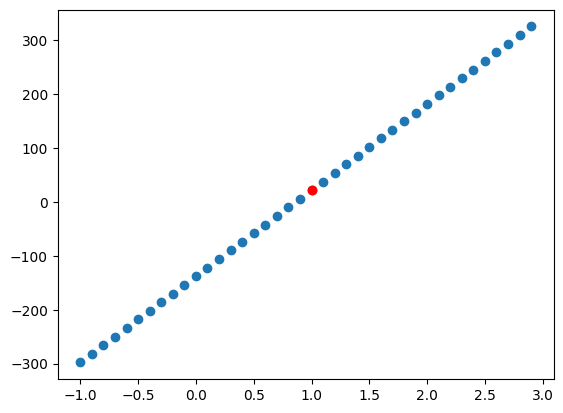

In [8]:
# function to calculate gradient
gradient=lambda w,y : ((w*80 + 11.99) -y)*2
# calculate gradients for different weights
gradients =gradient(ws,y)

# plot the graph for weights and their respective gradient
plt.scatter(ws,gradients)
plt.plot(1,gradient(1,y),'ro')


If our weight is above a certain value (around 0.82), gradient is positive , and our predictions are too large,and if weight is below this value then the gradient is negative and our prediction's are to small. Our goal is to get a place where gradient is zero so that our prediction matches the actual value.This point be either global minimum  or sometimes local minimum.

The partial derivative of loss tells us how much to adjust our parameter's to lower the loss.if we take the partial derivative of loss with respect to `b` it will be:
 
 $\frac{\partial L}{\partial b}=\partial L$

Now we take the partial derivative with respect to `w`:

$\frac{\partial L}{\partial w}=x*\partial L$

After calculating the partial derivatives we need to update the values of `w` and `b` by subtracting the partial derivatives from current values of `w` and `b` .We don't want to subtract the entire partial derivative, though - this would change the weight too much:

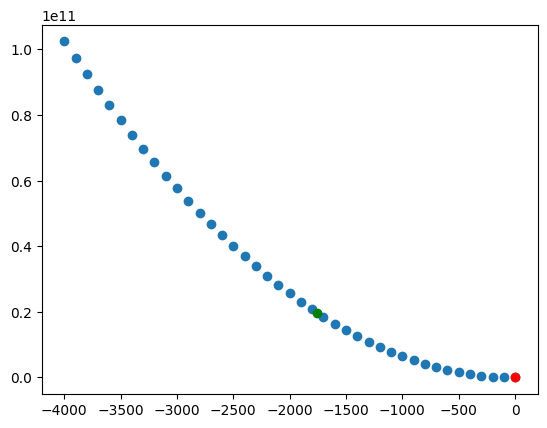

In [9]:
ws=np.arange(-4000,100,100)
losses=loss(ws,y)

# plot weights and losses
plt.scatter(ws,losses)

# original weight
plt.plot(1,loss(1,y),'ro')
# new weight
newWeight=1-gradient(1,y)*80
plt.plot(newWeight,loss(newWeight,y),'go')


# Learning Rate

Above we can see that the red one is the loss with original weight and green is the loss with new weight , which is much higher.his is a common problem with gradient descent - we adjust our parameters so much that we overshoot the minimum and end up with higher error.

This happens because the partial derivative doesn't know that the gradient will change in between the old weight value and the new weight value.  Since we're taking the derivative at a single point, it assumes that the gradient will stay constant.  Instead, as we can see in the chart below, the gradient changes quite a bit between the old weight and the new weight:

To adjust for this, we use a learning rate.  Instead of adjusting the weights and biases directly by the partial derivative, we multiply by the learning rate.  This enables us to take a smaller step, and stay in a region where the gradient doesn't change too much:

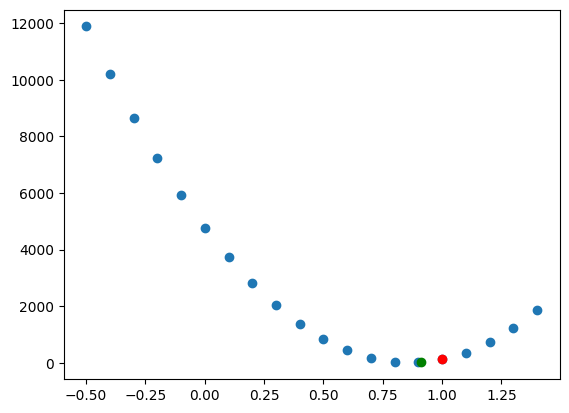

In [10]:
ws=np.arange(-.5,1.5,.1)
losses=loss(ws,y)

# plot the weight and losses
plt.scatter(ws,losses)

# original weight
plt.plot(1,loss(1,y),'ro')

# new weight
lr=5e-5
newWeight=1-lr*gradient(1,y)*80
plt.plot(newWeight,loss(newWeight,y),'go')

The new weight is around `.91` and also has loss less than the original weight.We can see that the gradient with new weight is diiferent from that of gradient with original weight.With thw weight of `1` it was `21.98` but now it's `15.65` it's still not `0` so we are not at global minimum.

To get to the global minimum, we repeat gradient descent multiple times to "descend" to the correct weight and bias values.  The method looks like:

- Predict y using the current parameters
- Measure the gradient
- Update $w$ and $b$ using the partial derivative

We repeat until a local or global minimum, which has a gradient close to `0`.

# Implementation

Let us now load our dataset and split it into 3 sets:

- Training set ,which will be used to train the algorithm.
- Validation set,which will be used to measure error during training.
- Testing set, which will be used to evaluate the model after it has been fit.



In [11]:
import numpy as np

Predictors=["tmax","tmin","rain"]
Target="tmax_tomorrow"

# Ensures that we get the same split everytime
np.random.seed(0)

split_data=np.split(data,[int(0.7*len(data)),int(0.85*len(data))])
(train_x,train_y),(valid_x,valid_y),(test_x,test_y)=[[d[Predictors].to_numpy(),d[[Target]].to_numpy()] for d in split_data]


c:\Users\Asus\OneDrive\Desktop\Machine_Learning\.venv\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


To train a Linear Regression model using Gradient Descent we need four things:

-  A way to initialize our parameters (`weight` and `bias`)
-  A forward pass that computes our predictions using parameters.
-  A loss function that calculates our error for the predictions.
- A backward pass to update parameters , to reduce loss.

To initialize our parameters we can use random initialization Its common to initialize `bias` as `0` or `1`.


In [12]:
import math

def init_parameters(predictors):
#   initiliaze model parameters
#   we are using k as a scaling factor to initially reduce the weights and bias
  k=math.sqrt(1 / predictors)

# We set a random seed so if we re-run this code, we get the same results
  np.random.seed(0)
  weight= np.random.rand(predictors ,1)*2*k-k
  bias=np.ones((1,1))*2*k-k
  return[weight,bias]


We initialize one $w$ value for each of our predictors (`tmax`, `tmin`, and `rain`).  We initialize one bias for each target variable.  In this case, we're only predicting one value for each row `tmax_tomorrow`, so we only have one bias.

In the forward pass of our network, we generate predictions by multiplying $w$ and $x$, then adding $b$:

In [13]:
def forward(param,x):
    weight ,bias =param

    prediction=x@weight+bias
    return prediction

Now we have `prediction` so now we have to calculate the error . Here we will be using two functions one for calculating Mean square error and other for calculating gradient error.

In [14]:
# function to find Mean Squared Error
def mse(actual,predicted):
    return np.mean((actual-predicted)**2)

# function to find gradient error
def mse_grad(actual,predicted):
    return predicted-actual

In the backward pass of the network we have to update the values of `weight` and `bias` by learning rate times the partial derivative of each.

In [17]:
def backward(param,x,lr,grad):
    # calculate gradients
    weight_grad=(x.T/x.shape[0])@grad
    bias_grad=np.mean(grad,axis=0)

    # update weights and bias
    param[0] -= weight_grad * lr
    param[1] -= bias_grad * lr

    return param

Finally we will now write a loop that:
 
- Makes prediction for whole training set.
- Computes gradient for each training example.
- Updates the parameters based on their gradients.

We will run the algorithm for several epochs - an epoch is each iteration over the training set.  Up to a point, more epochs will improve the accuracy.

We will print out the loss on the validation set regularly so we can monitor the loss.  We know we have too many epochs if the validation loss is increasing instead of decreasing.

In [30]:
lr = 1e-4
epochs = 50000
param = init_parameters(train_x.shape[1])

# Store weights and gradients so we can visualize
# Not necessary for algorithm
sample_rate = 100
samples = int(epochs / sample_rate)
historical_ws = np.zeros((samples, train_x.shape[1]))
historical_gradient = np.zeros((samples,))

for i in range(epochs):
    predictions = forward(param, train_x)
    grad = mse_grad(train_y, predictions)

    param = backward(param, train_x, lr, grad)

    # Store historical weights for visualization
    if i % sample_rate == 0:
        index = int(i / sample_rate)
        historical_gradient[index] = np.mean(grad)
        historical_ws[index,:] = param[0][:,0]

    # Display validation loss
    if i % 10000 == 0:
        predictions = forward(param, valid_x)
        valid_loss = mse(valid_y, predictions)

        print(f"Epoch {i} validation loss: {valid_loss} ")


Epoch 0 validation loss: 297.27540770706094 
Epoch 10000 validation loss: 22.647249675483113 
Epoch 20000 validation loss: 22.613777406314746 
Epoch 30000 validation loss: 22.581085439005864 
Epoch 40000 validation loss: 22.5491541585802 


Now we can print our final parameters to see how regression worked.This will hence show us the weight of each predictor and bias.

In [19]:
param

[array([[ 0.79210427],
        [ 0.2450347 ],
        [-0.06038591]]),
 array([[1.12700385]])]

We can also visualize the path of gradient descent.  We're limited to three dimensions, but we can look at $w_{1}$ (the weight for `tmax`) and $w_{2}$ (the weight for `tmin`) against the gradient.  We can see that we started in an area of very negative gradient, where our predictions were lower than the actual temperatures.  This happened because $w_{1}$ and $w_{2}$ were set to randomly initialized values.  Both parameters then moved towards the global minimum over many epochs, as we tried to move to an area of `0` gradient.

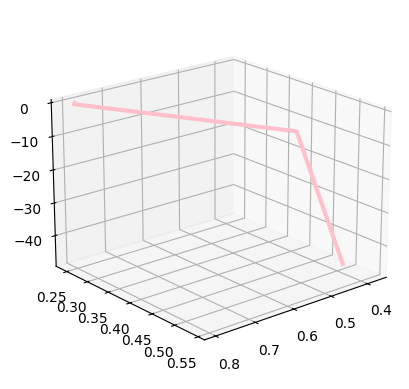

In [24]:
import matplotlib.pyplot as plt

# Create a figure and a 3D axis
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20,50)

# Plot the path of the optimization algorithm
ax.plot3D(historical_ws[:,0], historical_ws[:,1], historical_gradient, 'pink', linewidth=3, zorder=10)

# Show the plot
plt.show()

We can also evaluate the algorithm on the test set to measure error:


In [25]:
predictions = forward(param, test_x)
mse(test_y, predictions)

np.float64(23.335214564774656)